In [10]:
import pandas 
import seaborn as sns

In [3]:
data = pandas.read_csv("olympics.csv", sep="\t")
data

,City,Year,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal,Country,Int Olympic Committee code
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold,Hungary,HUN
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver,Austria,AUT
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze,Greece,GRE
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold,Greece,GRE
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver,Greece,GRE
...,...,...,...,...,...,...,...,...,...,...,...,...
29211,Beijing,2008,Wrestling,Wrestling Gre-R,"ENGLICH, Mirko",GER,Men,84 - 96kg,M,Silver,Germany,GER
29212,Beijing,2008,Wrestling,Wrestling Gre-R,"MIZGAITIS, Mindaugas",LTU,Men,96 - 120kg,M,Bronze,Lithuania,LTU
29213,Beijing,2008,Wrestling,Wrestling Gre-R,"PATRIKEEV, Yuri",ARM,Men,96 - 120kg,M,Bronze,Armenia,ARM
29214,Beijing,2008,Wrestling,Wrestling Gre-R,"LOPEZ, Mijain",CUB,Men,96 - 120kg,M,Gold,Cuba,CUB


In [4]:
data.columns

Index(['City', 'Year', 'Sport', 'Discipline', 'Athlete', 'NOC', 'Gender',
       'Event', 'Event_gender', 'Medal', 'Country',
       'Int Olympic Committee code'],
      dtype='object')

## Barres verticales

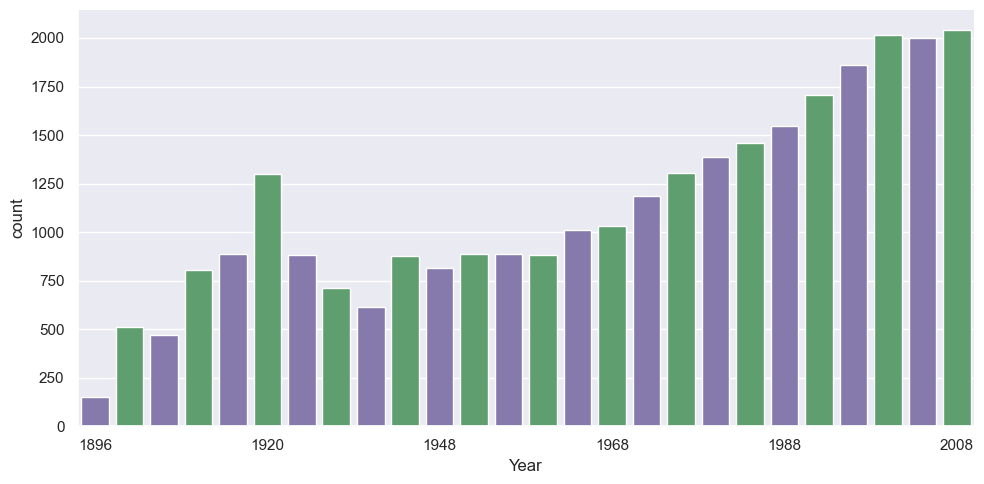

In [93]:
g = seaborn.catplot(x = "Year", data=data, aspect=2,
                       kind="count", palette=["m", "g"])
g.set_xticklabels(step=5)

## Barres horizontales

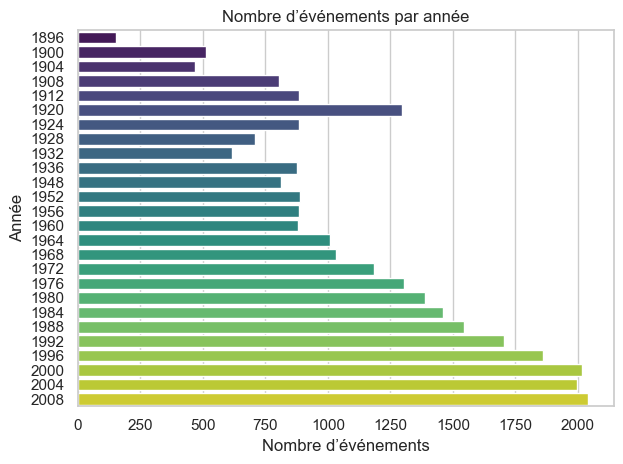

In [67]:
g = seaborn.countplot(y = "Year", data=data,  palette="viridis")
plt.title("Nombre d’événements par année")
plt.xlabel("Nombre d’événements")
plt.ylabel("Année")

plt.tight_layout()
plt.show()

## Points

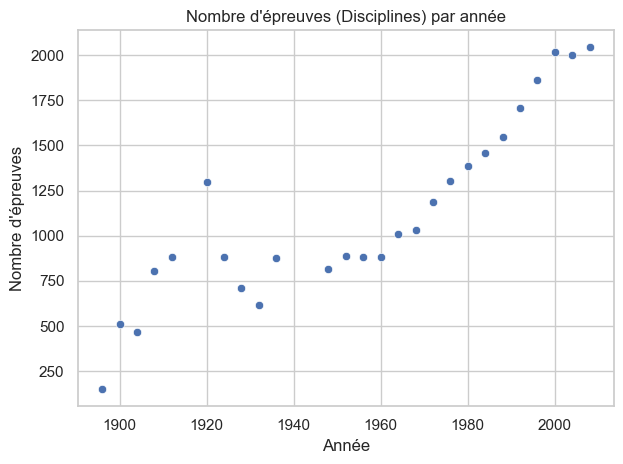

In [71]:
p = (data
     .groupby(['Year']).count()
    )
p['Discipline']

seaborn.scatterplot(x = p.index,y = p['Discipline'] )
plt.title("Nombre d'épreuves (Disciplines) par année")
plt.xlabel("Année")
plt.ylabel("Nombre d'épreuves")

plt.tight_layout()
plt.show()

## Barres multiples verticales

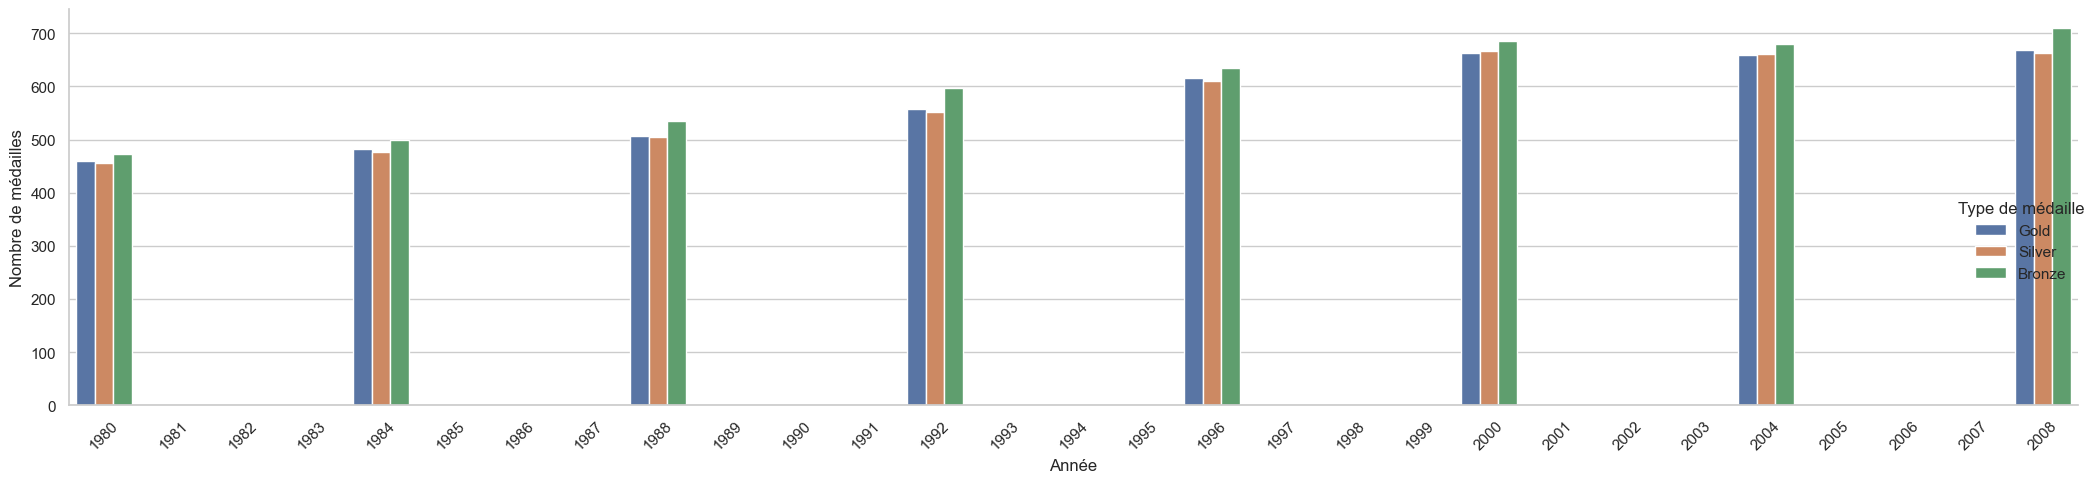

In [72]:
g = seaborn.catplot(x = "Year", data=data, aspect=4, kind='count',
                       hue='Medal', order=range(1980, 2009))
g.set_axis_labels("Année", "Nombre de médailles")
g._legend.set_title("Type de médaille")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

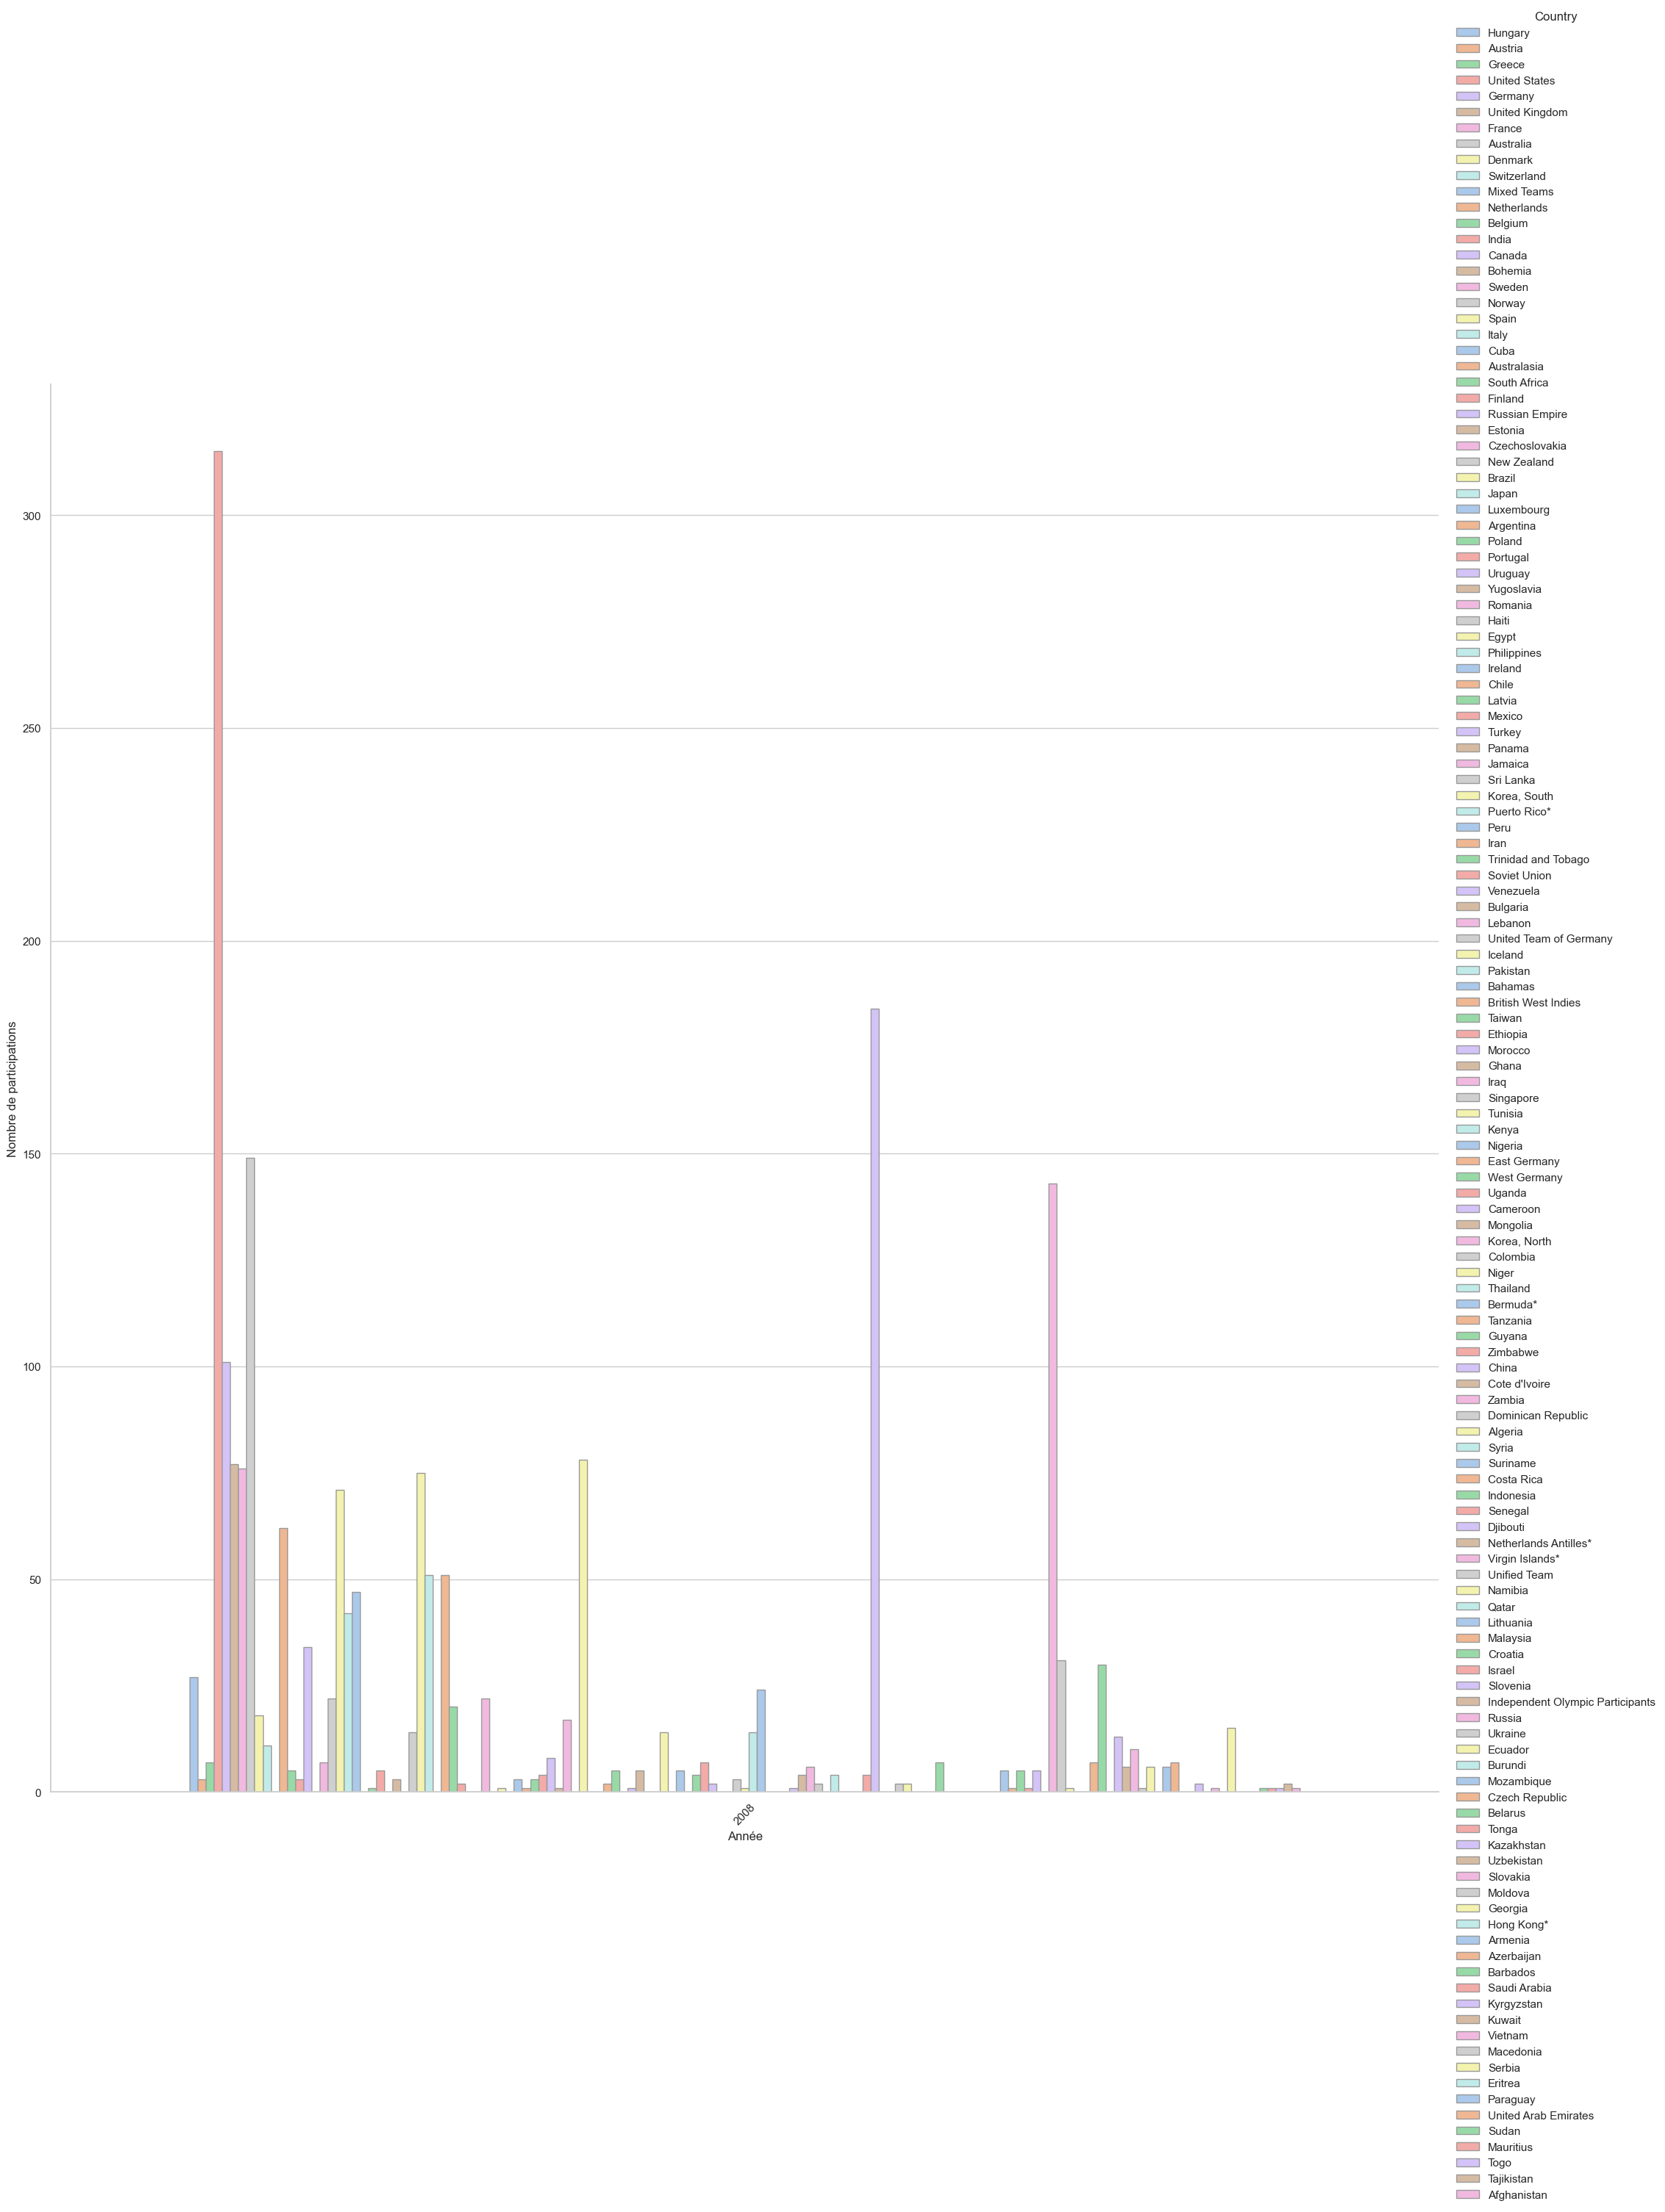

In [73]:
g = seaborn.catplot(x = "Year", hue="Country", kind="count",
            palette="pastel", edgecolor=".6", height =20,
            data=data, order=range(2008, 2009));
g.set_axis_labels("Année", "Nombre de participations")
plt.xticks(rotation=45)
plt.show()

## Barres multiples horizontales

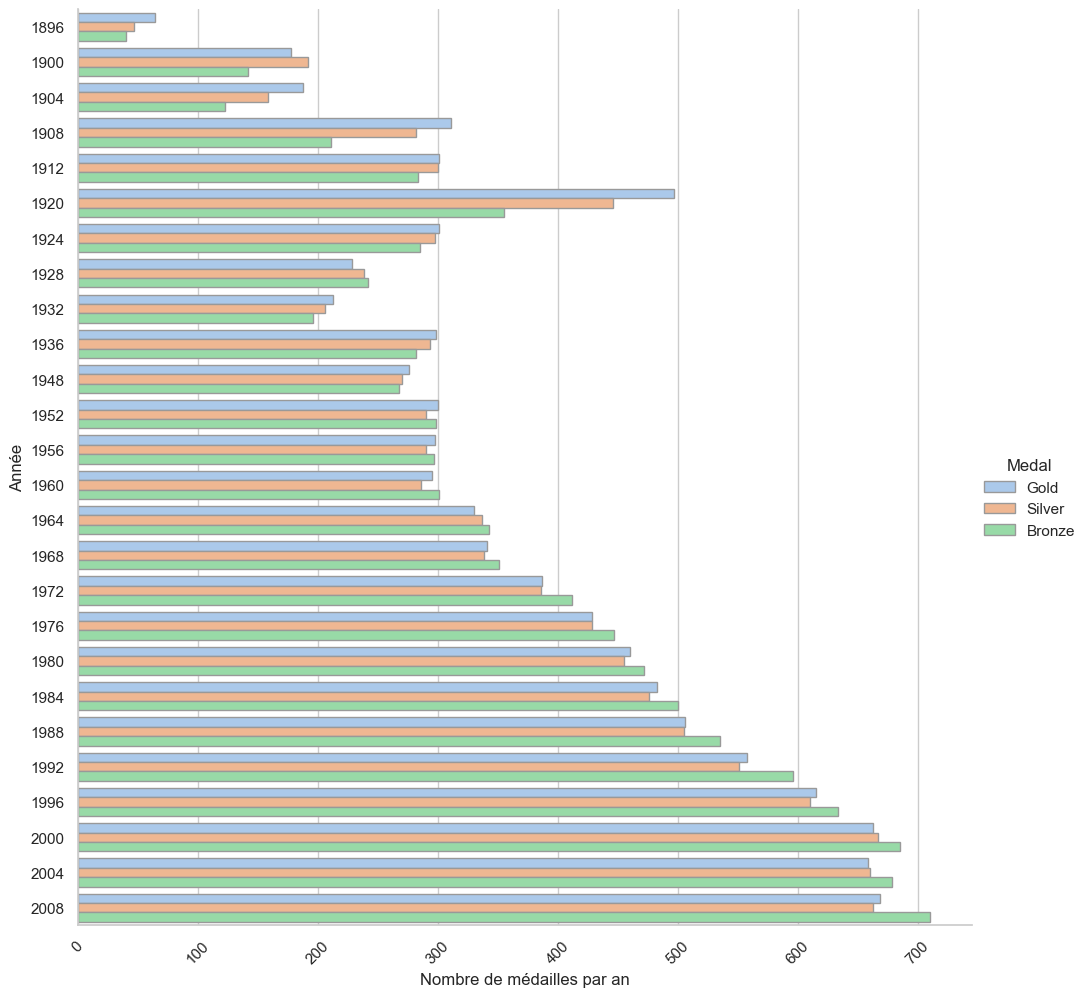

In [74]:
g = seaborn.catplot(y="Year", hue="Medal", kind="count",
            palette="pastel", edgecolor=".6",height =10,
            data=data);
g.set_axis_labels("Nombre de médailles par an", "Année")

plt.xticks(rotation=45)

plt.show()

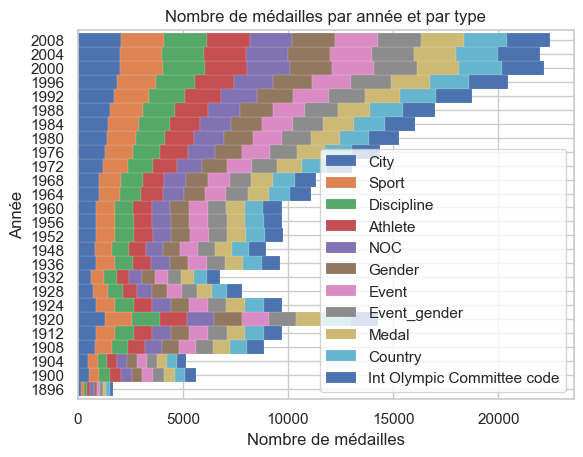

In [75]:
p = (data
     .groupby(['Year']).count()
    )
p.plot(kind='barh', stacked=True, width=1, lw=0.1)

plt.xlabel("Nombre de médailles")
plt.ylabel("Année")
plt.title("Nombre de médailles par année et par type")
plt.show()

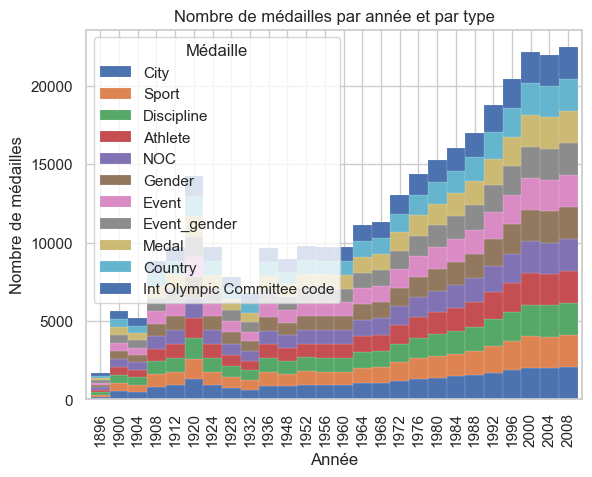

In [76]:
p.plot(kind='bar', stacked=True, width=1, lw=0.1)
plt.xlabel("Année")
plt.ylabel("Nombre de médailles")
plt.title("Nombre de médailles par année et par type")
plt.legend(title="Médaille")
plt.show()

## Cartes de chaleur

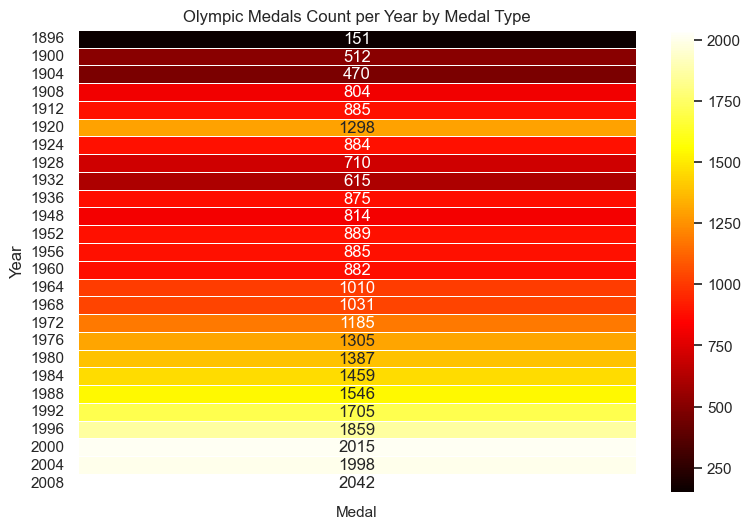

In [77]:
import matplotlib
p = data.groupby('Year')['Medal'].count().to_frame()
p
f, ax = matplotlib.pyplot.subplots(figsize=(9, 6))
seaborn.heatmap(p, annot=True, fmt="d", cmap= 'hot', linewidths=.5, ax=ax)
plt.title("Olympic Medals Count per Year by Medal Type")
plt.show()

## Bubble chart

In [78]:
medal_size = {"Gold": 3, "Silver": 2, "Bronze": 1}
data['Medal_size'] = data['Medal'].map(medal_size)

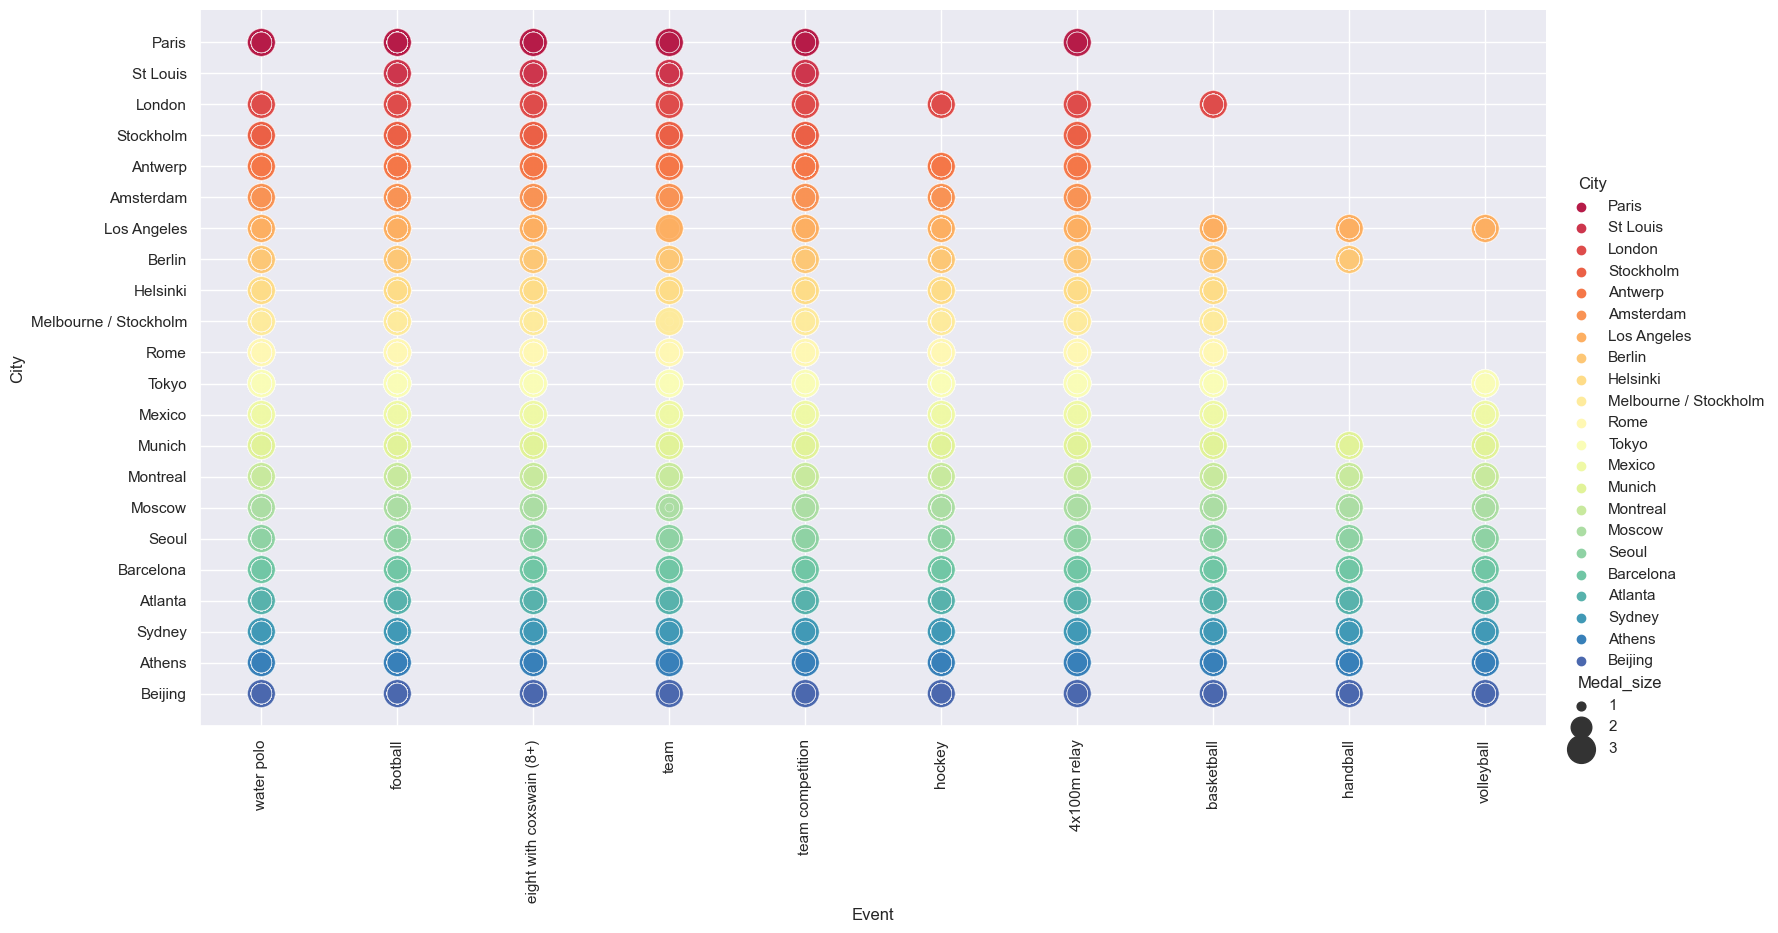

In [ ]:
sns.set()

g = sns.relplot(
    x="Event", 
    y="City", 
    hue="City", 
    size="Medal_size",
    sizes=(40, 400), 
    alpha=.6, 
    palette="Spectral",
    height=8, 
    aspect=2,   
    data=data_filtered
)
g.set_axis_labels("Event", "City")
plt.xticks(rotation=90)  
plt.show()

## Multiples plots sur une même figure

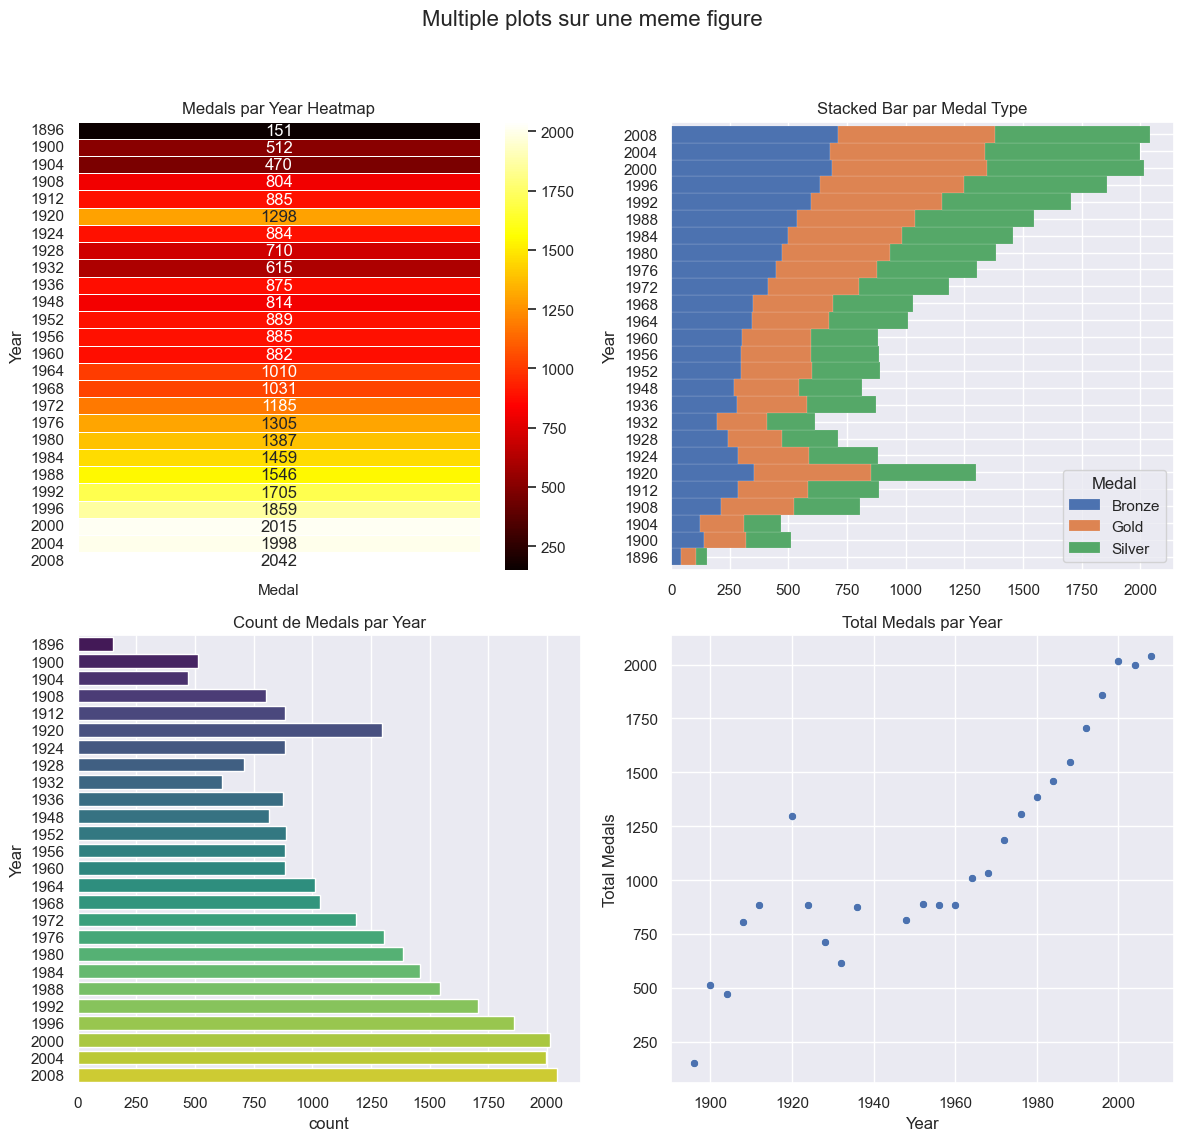

In [ ]:
p = data.groupby('Year')['Medal'].count().to_frame()  # Medals per year
p_pivot = data.pivot_table(index='Year', columns='Medal', aggfunc='size', fill_value=0) 

fig = plt.figure(figsize=(12, 12))
fig.suptitle("Multiple plots sur une meme figure", fontsize=16)

ax1 = fig.add_subplot(221)
sns.heatmap(p, annot=True, fmt="d", cmap='hot', linewidths=0.5, ax=ax1)
ax1.set_title("Medals par Year Heatmap")

ax2 = fig.add_subplot(222)
p_pivot.plot(kind='barh', stacked=True, width=1, lw=0.1, ax=ax2)
ax2.set_title("Stacked Bar par Medal Type")

ax3 = fig.add_subplot(223)
sns.countplot(y="Year", data=data, palette="viridis", ax=ax3)
ax3.set_title("Count de Medals par Year")

ax4 = fig.add_subplot(224)
sns.scatterplot(x=p.index, y=p['Medal'], ax=ax4)
ax4.set_title("Total Medals par Year")
ax4.set_ylabel("Total Medals")
ax4.set_xlabel("Year")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  
plt.show()

## Modification de la taille des figures, des fonts, des titres

C:\Users\sanar\AppData\Local\Temp\ipykernel_17252\1845093474.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


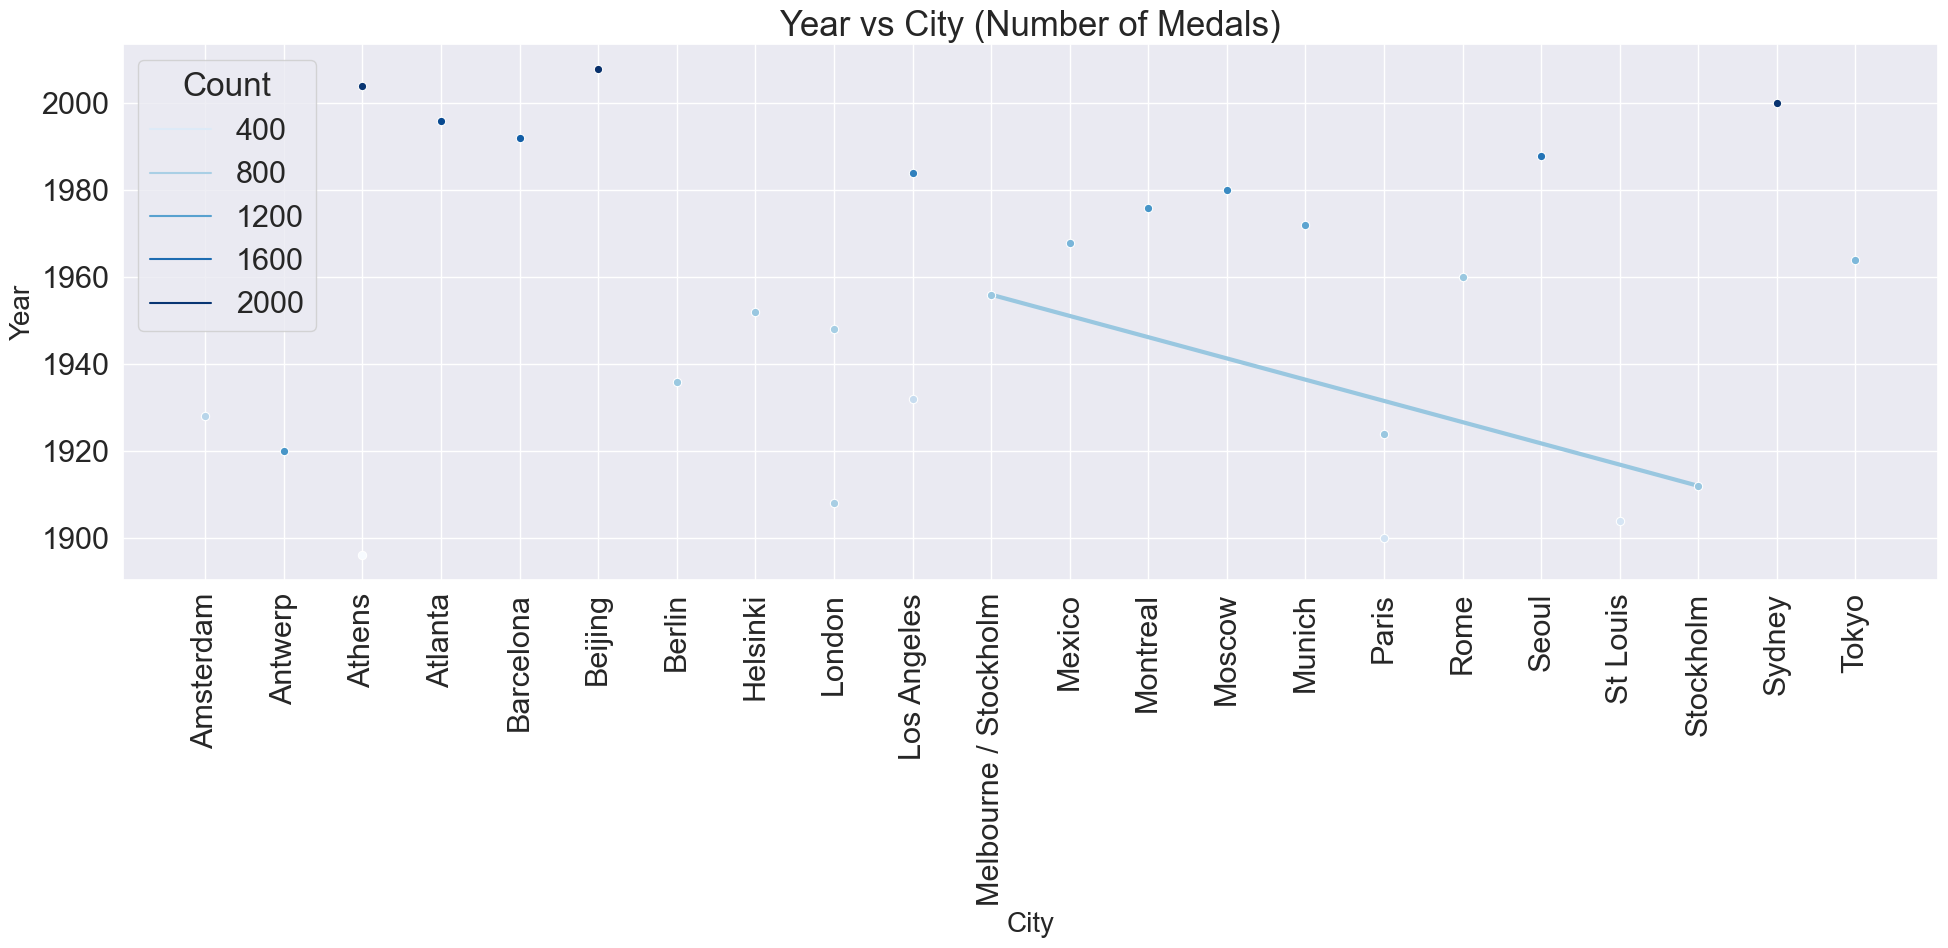

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 10))
sns.set(font_scale=2)

city_year = data.groupby(['City', 'Year']).size().reset_index(name='Count')

ax = sns.lineplot(
    x='City',
    y='Year',
    data=city_year,
    hue='Count',          
    marker='o',
    linewidth=3,
    palette='Blues'
)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

ax.set_title("Year vs City (Number of Medals)", fontsize=25)
ax.set_xlabel("City", fontsize=20)
ax.set_ylabel("Year", fontsize=20)

plt.tight_layout()
plt.show()


## Sauvegarder la figure


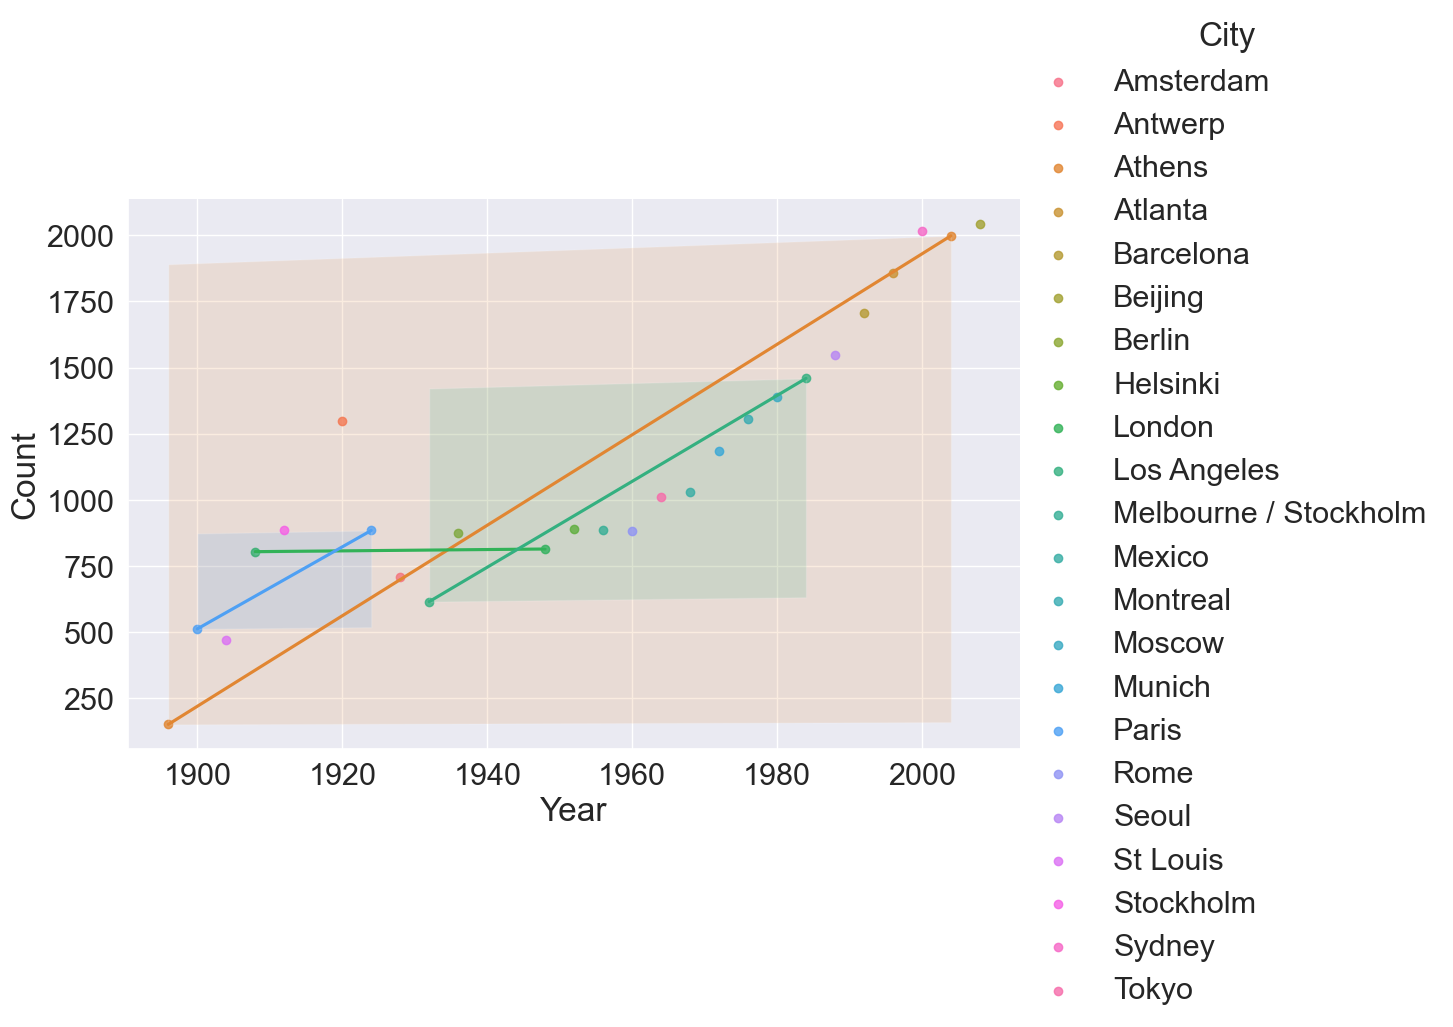

In [86]:
mpg = sns.load_dataset("mpg")
g = sns.lmplot(
    x='Year',
    y='Count',
    hue='City',      
    height=7,
    aspect=1.6,
    data=city_year
)

g.savefig('medals_per_city_year.png', dpi=300)